<a href="https://colab.research.google.com/github/OIJTUMUCT/MFTI/blob/main/Lebedev_I_A__FMnist.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.layers import Dense
from tensorflow.keras.models import Sequential
from tensorflow.keras.backend import clear_session
from tensorflow.keras import layers, models
from tensorflow.keras import optimizers

import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt

In [ ]:
# инициализация тренировочного датасета
train = pd.read_csv("./data/fmnist_train.csv")
train.shape

(17040, 786)

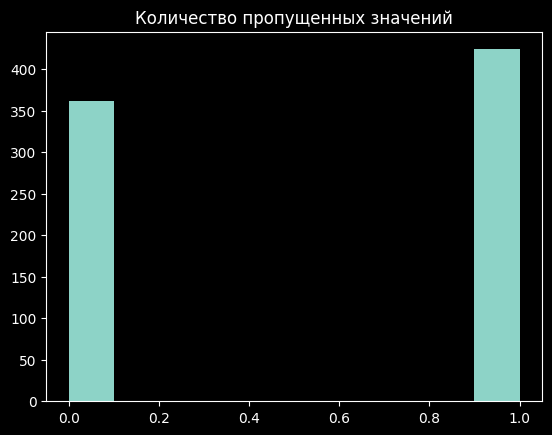

In [ ]:
plt.hist(train.isna().sum())
plt.title("Количество пропущенных значений")
plt.show()

> Можно видеть, что количество пропусков незначительно

In [ ]:
train = train.dropna()
train.shape

(17039, 786)

> Предыдущее предположение было верно и очистив датасет от нанов мы удалили 1 картинку

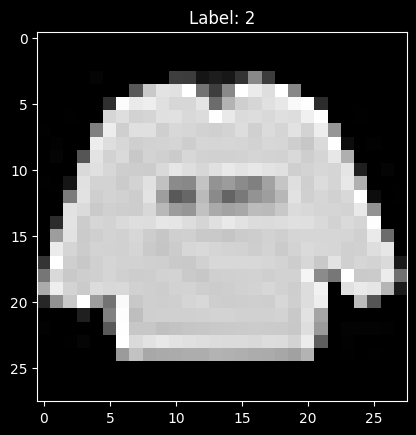

In [ ]:
X, y = train.iloc[:, 1:].drop(
    columns=["Id"]).values, train.iloc[:, 0].values # дропн столбца ID который аналогичен индексу

# отобразим первый элемент
image = X[0].reshape(28, 28)
plt.imshow(image, cmap='gray')
plt.title(f"Label: {y[0]}")
plt.show()

In [ ]:
# Разделим на тренировочную и тестовую выборки
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

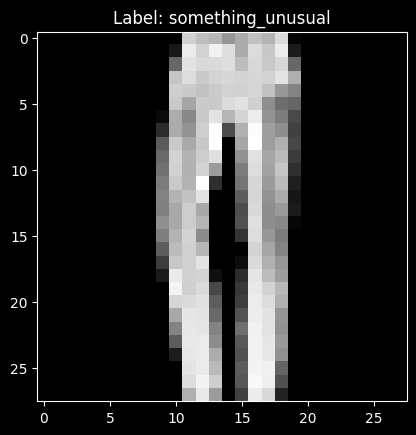

In [ ]:
# Инициализируем валидационный датасет
valid = pd.read_csv("./data/fmnist_test.csv")
X_valid = valid.drop(columns=["Id"]).values

# Отобразим второй элемент
image = X_valid[1].reshape(28, 28)
plt.imshow(image, cmap='gray')
plt.title("Label: something_unusual")
plt.show()

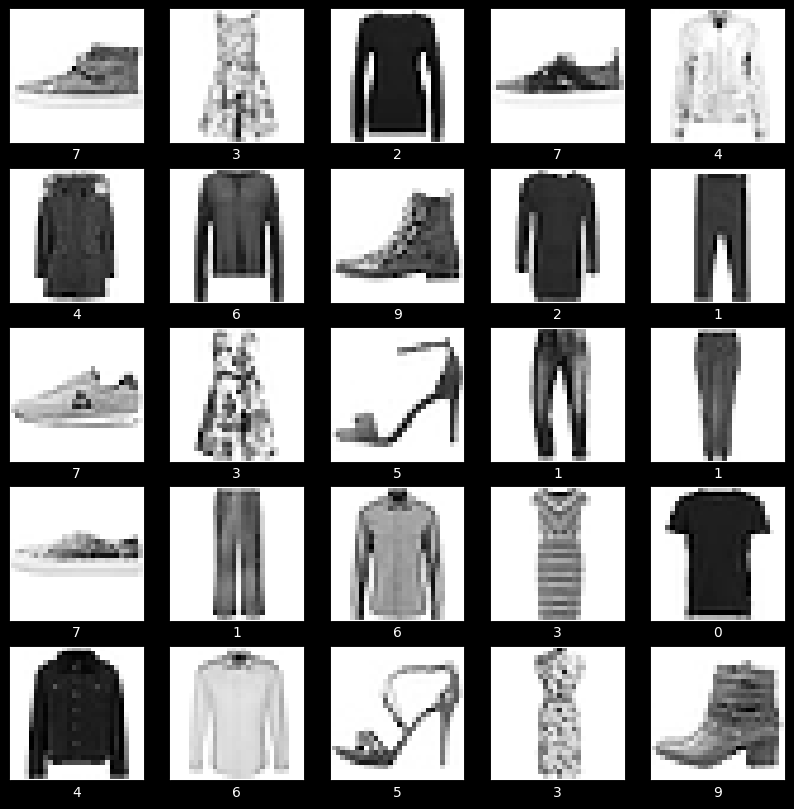

In [ ]:
# посмотрим побольше примеров
plt.figure(figsize=(10,10))
for i in range(25):
    plt.subplot(5,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(X_train[i].reshape((28, 28)), cmap="Greys")
    plt.xlabel(y_train[i])
plt.show()

In [ ]:
# начинаем преобразовывать размерности входных данных для подачи на сверточные слои
X_train_reshaped = X_train.reshape(-1, 28, 28).astype('float32')
X_test_reshaped = X_test.reshape(-1, 28, 28).astype('float32')
X_valid_reshaped = X_valid.reshape(-1, 28, 28).astype('float32') # cразу отформатируем валидационный сет для формирования предсказания

# добавляем размер канала: (num_samples, 28, 28, 1)
X_train_cnn = X_train_reshaped.reshape(-1, 28, 28, 1)
X_test_cnn = X_test_reshaped.reshape(-1, 28, 28, 1)
X_valid_cnn = X_valid_reshaped.reshape(-1, 28, 28, 1) # cразу отформатируем валидационный сет для формирования предсказания

# нормируем и центрируем
X_train_float = X_train_cnn / 255 - 0.5
X_test_float = X_test_cnn / 255 - 0.5
X_valid_float = X_valid_cnn / 255 - 0.5 # cразу отформатируем валидационный сет для формирования предсказания

# one-hot encode для ответов
y_train_oh = keras.utils.to_categorical(y_train, 10)
y_test_oh = keras.utils.to_categorical(y_test, 10)

In [ ]:
from tensorflow.keras.callbacks import Callback

class StopAtAccuracy(Callback):
    def __init__(self, target=0.92):
        super().__init__()
        self.target = target

    def on_epoch_end(self, epoch, logs=None): # прекращает тренировку модели при достижении определённой точности
        val_acc = logs.get("val_accuracy")
        if val_acc is not None and val_acc >= self.target:
            print(f"\nДостигнута целевая точность {val_acc:.4f}.")
            self.model.stop_training = True

Epoch 1/100


/opt/homebrew/Caskroom/miniconda/base/envs/tf-mac/lib/python3.11/site-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


54/54 ━━━━━━━━━━━━━━━━━━━━ 7s 65ms/step - accuracy: 0.2217 - loss: 2.7656 - val_accuracy: 0.1388 - val_loss: 2.6549
Epoch 2/100
54/54 ━━━━━━━━━━━━━━━━━━━━ 2s 46ms/step - accuracy: 0.5327 - loss: 1.2732 - val_accuracy: 0.0939 - val_loss: 2.8392
Epoch 3/100
54/54 ━━━━━━━━━━━━━━━━━━━━ 2s 46ms/step - accuracy: 0.6504 - loss: 0.9621 - val_accuracy: 0.1068 - val_loss: 3.6087
Epoch 4/100
54/54 ━━━━━━━━━━━━━━━━━━━━ 2s 45ms/step - accuracy: 0.6903 - loss: 0.8392 - val_accuracy: 0.1077 - val_loss: 4.0225
Epoch 5/100
54/54 ━━━━━━━━━━━━━━━━━━━━ 2s 45ms/step - accuracy: 0.7260 - loss: 0.7418 - val_accuracy: 0.1048 - val_loss: 5.1137
Epoch 6/100
54/54 ━━━━━━━━━━━━━━━━━━━━ 2s 45ms/step - accuracy: 0.7374 - loss: 0.6948 - val_accuracy: 0.1540 - val_loss: 3.9213
Epoch 7/100
54/54 ━━━━━━━━━━━━━━━━━━━━ 2s 45ms/step - accuracy: 0.7561 - loss: 0.6559 - val_accuracy: 0.3392 - val_loss: 2.7616
Epoch 8/100
54/54 ━━━━━━━━━━━━━━━━━━━━ 2s 46ms/step - accuracy: 0.7746 - loss: 0.6106 - val_accuracy: 0.3885 - val_l

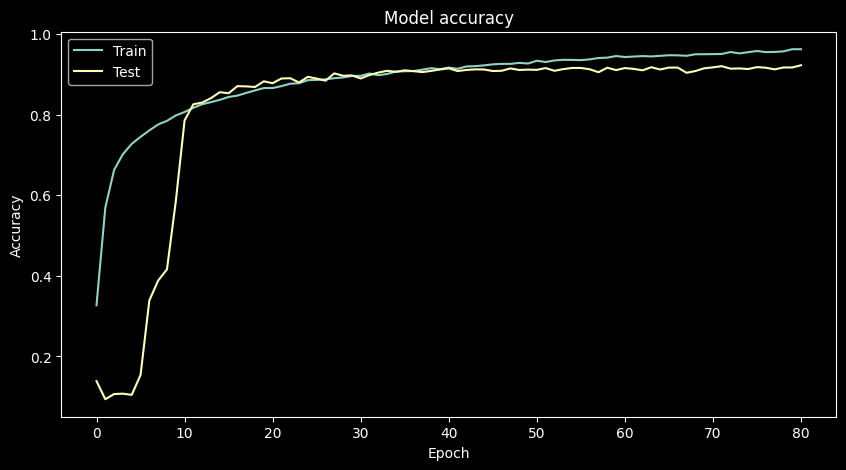

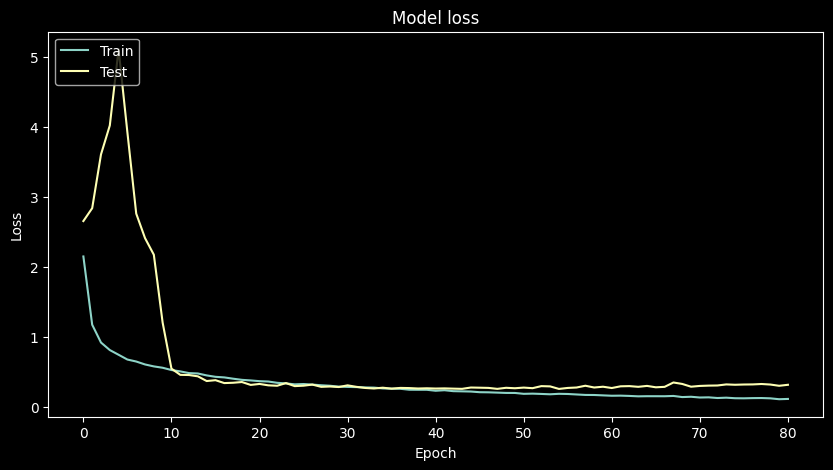

107/107 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step
Test Accuracy: 0.9231220657276995


In [ ]:
model = models.Sequential()

# 1-ый сверточный блок
model.add(layers.Conv2D(32, (3,3), activation='relu', padding='same', input_shape=(28,28,1)))
model.add(layers.BatchNormalization())
model.add(layers.Conv2D(32, (3,3), activation='relu', padding='same'))
model.add(layers.BatchNormalization())
model.add(layers.SpatialDropout2D(0.25))         # регуляризация
model.add(layers.MaxPooling2D((2,2)))

# 2-ой сверточный блок
model.add(layers.Conv2D(64, (3,3), activation='relu', padding='same'))
model.add(layers.BatchNormalization())
model.add(layers.Conv2D(64, (3,3), activation='relu', padding='same'))
model.add(layers.BatchNormalization())
model.add(layers.SpatialDropout2D(0.35))         # регуляризация
model.add(layers.MaxPooling2D((2,2)))

# 3-ий сверточный блок
model.add(layers.Conv2D(128, (3,3), activation='relu', padding='same'))
model.add(layers.BatchNormalization())
model.add(layers.Conv2D(128, (3,3), activation='relu', padding='same'))
model.add(layers.BatchNormalization())
model.add(layers.SpatialDropout2D(0.35))      # пространственное усреднение
model.add(layers.Dropout(0.4))                    # Dropout после схлопывания

# 4-ый сверточный блок
model.add(layers.Conv2D(256, (3,3), activation='relu', padding='same'))
model.add(layers.BatchNormalization())
model.add(layers.Conv2D(256, (3,3), activation='relu', padding='same'))
model.add(layers.BatchNormalization())
model.add(layers.SpatialDropout2D(0.4))          # регуляризация
model.add(layers.MaxPooling2D((2,2)))            # уменьшаем размер

model.add(layers.GlobalAveragePooling2D())
model.add(layers.Dropout(0.4))

# полносвязные слои
model.add(layers.Dense(256, activation='relu'))
model.add(layers.BatchNormalization())
model.add(layers.Dropout(0.5))                    # Dropout для dense
model.add(layers.Dense(10, activation='softmax')) # выходной слой

# компиляция
optimizer = optimizers.Adam(learning_rate=0.0005)

model.compile(
    loss='categorical_crossentropy',
    optimizer=optimizer,
    metrics=['accuracy']
)

stop_callback = StopAtAccuracy(target=0.922)

# обучение
history = model.fit(
    X_train_float, y_train_oh,
    batch_size=256,
    epochs=100,
    validation_data=(X_test_float, y_test_oh),
    callbacks=[stop_callback]
)

# графики
plt.style.use(['dark_background'])
fig, ax = plt.subplots(figsize=(10, 5))
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()

fig, ax = plt.subplots(figsize=(10, 5))
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()

# оценка
predictions = model.predict(X_test_float)
predicts = predictions.argmax(axis=1)
print('Test Accuracy:', accuracy_score(y_test, predicts))

In [ ]:
# валидационное предсказание

# получение вероятностей для каждого класса
predictions_val = model.predict(X_valid_float)

# преобразование вероятностей в предсказанные классы
predicts_val = predictions_val.argmax(
    axis=1)  # axis=1 для one-hot выхода модели

# сохранение предсказания в виде файла
temp = pd.Series(predicts_val).reset_index()
temp.rename(columns={"index": "Id", 0: "label"}).to_csv(
    "./data/sample_submission_2.csv", index=0)

# проверка формата
pd.read_csv("./data/sample_submission_2.csv")

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step


,Id,label
0,0,0
1,1,1
2,2,2
3,3,2
4,4,3
...,...,...
9995,9995,0
9996,9996,6
9997,9997,8
9998,9998,8
